In [1]:
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import normalize
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D


In [4]:
model = Sequential()

model.add(Conv2D(2,(3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(4,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(128, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))




model.add(Flatten())
model.add(Dense(units=254, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))


model.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])





train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('J:/KJSCE-MP/Non-Segmented CNN/dataset/train',target_size = (200, 200),batch_size = 32, class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('J:/KJSCE-MP/Non-Segmented CNN/dataset/val', target_size = (200, 200), batch_size = 16, class_mode = 'categorical')

labels = (training_set.class_indices)
print(labels)


hist = model.fit(training_set, steps_per_epoch = 30, epochs = 40, validation_data=valid_set)

Found 4081 images belonging to 4 classes.
Found 94 images belonging to 4 classes.
{'Maize - Blight': 0, 'Maize - Common_Rust': 1, 'Maize - Gray_Leaf_Spot': 2, 'Maize - Healthy': 3}
Epoch 1/40
30/30 [==============================] - 32s 1s/step - loss: 1.2127 - accuracy: 0.3719 - val_loss: 0.9743 - val_accuracy: 0.6489
Epoch 2/40
30/30 [==============================] - 26s 862ms/step - loss: 1.0094 - accuracy: 0.5646 - val_loss: 0.9881 - val_accuracy: 0.5106
Epoch 3/40
30/30 [==============================] - 25s 847ms/step - loss: 0.9328 - accuracy: 0.5667 - val_loss: 1.3522 - val_accuracy: 0.4468
Epoch 4/40
30/30 [==============================] - 24s 792ms/step - loss: 0.8301 - accuracy: 0.5719 - val_loss: 1.6597 - val_accuracy: 0.4043
Epoch 5/40
30/30 [==============================] - 28s 921ms/step - loss: 0.8128 - accuracy: 0.5760 - val_loss: 1.7383 - val_accuracy: 0.4574
Epoch 6/40
30/30 [==============================] - 28s 925ms/step - loss: 0.8148 - accuracy: 0.5708 - val_

In [ ]:
img = "E:/KJSCE_MP/MiniProject/dataset/test/Corn_Health (61).jpg"

test_img = load_img(img, target_size=(200,200))

test_img = img_to_array(test_img)/255
test_img = np.expand_dims(test_img, axis = 0)


result = model.predict(test_img)

pred = np.argmax(result, axis=1)
print(pred)

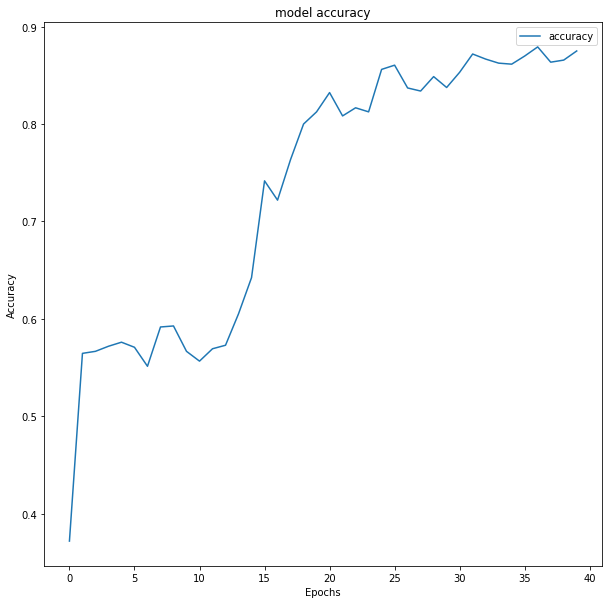

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy"])
plt.show()

In [16]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

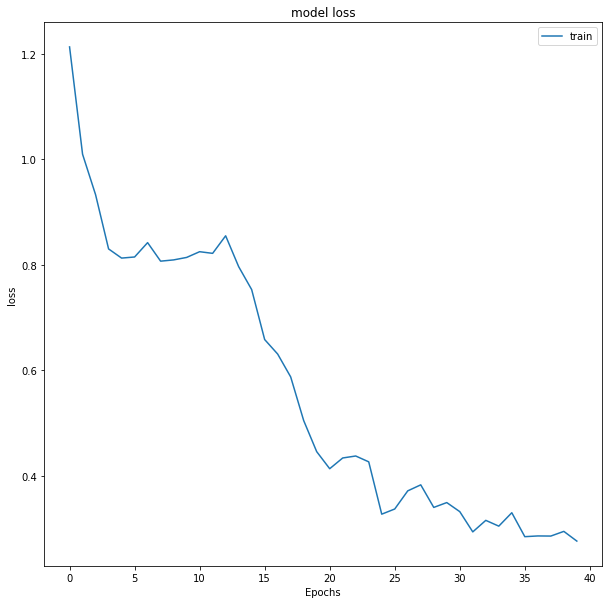

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(["train"])
plt.show()

In [19]:
hist.history

{'loss': [1.2126542329788208,
  1.0094103813171387,
  0.9327776432037354,
  0.8301090598106384,
  0.812752902507782,
  0.8148338794708252,
  0.8420153856277466,
  0.8069304823875427,
  0.8093138337135315,
  0.813994288444519,
  0.8248437643051147,
  0.8217190504074097,
  0.854963481426239,
  0.7965651154518127,
  0.7531059980392456,
  0.6584740877151489,
  0.6310144662857056,
  0.5877298712730408,
  0.505054771900177,
  0.44621020555496216,
  0.41390135884284973,
  0.43424034118652344,
  0.4379815459251404,
  0.42691490054130554,
  0.3278304934501648,
  0.337619423866272,
  0.37196043133735657,
  0.38336020708084106,
  0.3406100571155548,
  0.3497810661792755,
  0.3326149582862854,
  0.29428961873054504,
  0.3161000907421112,
  0.3051512837409973,
  0.3305317461490631,
  0.28520768880844116,
  0.2865850031375885,
  0.28636887669563293,
  0.29523128271102905,
  0.2768440246582031],
 'accuracy': [0.37187498807907104,
  0.5645833611488342,
  0.5666666626930237,
  0.5718749761581421,
  0.5

In [20]:
model.save('backend_model.h5')

In [21]:
from tensorflow.keras.models import load_model

filepath = 'J:/KJSCE-MP/Non-Segmented CNN/backend_model.h5'
model = load_model(filepath)
print(model)

print("Model Loaded Successfully")





Model Loaded Successfully


In [42]:
img = "J:/KJSCE-MP/Non-Segmented CNN/dataset/test/Corn_Health (61).jpg"

test_img = load_img(img, target_size=(200,200))


test_img = img_to_array(test_img)/255
test_img = np.expand_dims(test_img, axis = 0)


result = model.predict(test_img)

pred = np.argmax(result, axis=1)
print(pred)

1/1 [==============================] - 0s 30ms/step
[3]
